In [53]:
import numpy as np
import pandas as pd
import glob 

In [54]:
cur_path = "imbalance/"

In [55]:
normal_file_names = glob.glob("normal/normal/*.csv")
imnormal_file_names_6g = glob.glob(cur_path+'/imbalance\\6g/*.csv')
imnormal_file_names_10g = glob.glob(cur_path+'/imbalance\\10g/*.csv')
imnormal_file_names_15g = glob.glob(cur_path+'/imbalance\\15g/*.csv')
imnormal_file_names_20g = glob.glob(cur_path+'/imbalance\\20g/*.csv')
imnormal_file_names_25g = glob.glob(cur_path+'/imbalance\\25g/*.csv')
imnormal_file_names_30g = glob.glob(cur_path+'/imbalance\\30g/*.csv')

In [56]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [57]:
data_n = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)

In [58]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250000 entries, 0 to 12249999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
dtypes: float64(8)
memory usage: 747.7 MB


## Down Sampler

In [59]:
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [60]:
data_n = downSampler(data_n, 0, 3000)
data_6g = downSampler(data_6g, 0, 3000)
data_10g = downSampler(data_10g, 0, 3000)
data_15g = downSampler(data_15g, 0, 3000)
data_20g = downSampler(data_20g, 0, 3000)
data_25g = downSampler(data_25g, 0, 3000)
data_30g = downSampler(data_30g, 0, 3000)

C:\Users\aryan\AppData\Local\Temp\ipykernel_23936\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_23936\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_23936\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_23936\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed f

In [61]:
data_n

0         1         2         3         4         5         6  \
0     0.022645 -0.078676 -0.007348 -0.002548  0.016181  0.002921 -0.063424   
1     0.194728  0.006285 -0.001592  0.000879  0.284749  0.003741  0.082444   
2     0.204397  0.041341  0.010976  0.000935  0.028425  0.004219  0.047112   
3    -0.533598 -0.004331 -0.007112  0.000154 -0.743627 -0.005879 -0.202761   
4     0.178405 -0.068147 -0.008045 -0.000463  0.408803  0.007812  0.020121   
...        ...       ...       ...       ...       ...       ...       ...   
4078  0.068855  0.010722  0.016890  0.003541 -0.058541 -0.007598 -0.504534   
4079 -0.122675 -0.004442 -0.033163 -0.003439 -0.072882 -0.005923 -0.802720   
4080  0.081742 -0.000815  0.028020 -0.002171  0.063778  0.014560 -0.476452   
4081 -0.094145  0.006643 -0.016014  0.004898 -0.051514 -0.010467 -0.642429   
4082  0.087931  0.008297 -0.004762 -0.000089 -0.225145 -0.038096 -1.075359   

             7  
0     0.014580  
1     0.010456  
2    -0.000600  
3     0.006129  
4     0.013837  
...        ...  
4078  0.009460  
4079  0.011939  
4080  0.011239  
4081  0.009683  
4082  0.011898  

[4083 rows x 8 columns]

#### FFT Convolve

In [62]:
from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [63]:
data_n = FFT(data_n)
data_6g = FFT(data_6g)
data_10g = FFT(data_10g)
data_15g = FFT(data_15g)
data_20g = FFT(data_20g)
data_25g = FFT(data_25g)
data_30g = FFT(data_30g)

In [64]:
y_1 = pd.DataFrame(np.ones(int(len(data_n)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)),1),5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)),1),6))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6,y_7], ignore_index=True)
y

0
0      1
1      1
2      1
3      1
4      1
...   ..
56150  6
56151  6
56152  6
56153  6
56154  6

[56155 rows x 1 columns]

In [65]:
data = pd.concat([data_n,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g],ignore_index=True)

In [66]:
data

0         1         2         3         4         5         6   \
0      0.001991 -0.006730 -0.001407  0.000088 -0.003655  0.017255 -0.025329   
1      0.014991  0.009726 -0.001209  0.001579 -0.021764 -0.002493 -0.210986   
2      0.001491 -0.000417 -0.002494 -0.001738 -0.077611 -0.021855 -0.374311   
3     -0.053023  0.002564  0.003669  0.003050  0.074139  0.018795  0.336061   
4      0.060302 -0.011247  0.006397 -0.004104  0.059249  0.021329 -0.095105   
...         ...       ...       ...       ...       ...       ...       ...   
56150  0.023028  0.122091 -0.029240 -0.069739 -0.081901 -0.195084 -0.367312   
56151 -0.024604 -0.068524  0.005976  0.057336  0.167918 -0.041752  0.347939   
56152 -0.033662  0.016916  0.123318 -0.040053 -0.211648  0.101426 -0.212140   
56153  0.069063  0.006406 -0.174950  0.017933  0.146251  0.075047 -0.199727   
56154 -0.041608 -0.012528  0.097284 -0.002346  0.082000 -0.131610  0.550971   

             7         8         9         10        11        12        13  \
0      0.086469  0.003842  0.001314 -0.003264 -0.003815  0.067683 -0.016433   
1      0.046191 -0.058384 -0.012010 -0.332014 -0.007937 -0.048389 -0.020243   
2     -0.004860 -0.030987 -0.004327 -0.240254 -0.008110 -0.073163 -0.012372   
3      0.034691  0.194288  0.034067  0.685982  0.001368  0.199294 -0.024677   
4      0.087142 -0.060767 -0.012301 -0.205720 -0.012624  0.051379 -0.035089   
...         ...       ...       ...       ...       ...       ...       ...   
56150 -0.063619  0.113279  0.076389  0.056433 -0.029617  4.434382  0.098055   
56151 -0.209633 -0.161035 -0.052772 -2.950685 -0.600019 -3.574426  0.083321   
56152  0.847063 -0.385319 -0.207360 -2.866690 -0.583052 -6.114323  0.058197   
56153  0.474579 -0.032530 -0.043548 -1.094466 -0.245825 -2.594581 -0.041455   
56154 -0.409616 -0.132090 -0.001824  0.160496  0.023364 -0.706158 -0.079432   

             14  
0      0.000173  
1      0.000266  
2      0.000258  
3      0.000359  
4      0.000480  
...         ...  
56150  0.001081  
56151  0.000702  
56152  0.000447  
56153  0.000640  
56154  0.000272  

[56155 rows x 15 columns]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, shuffle=True)

In [68]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (42116, 15)
Shape of Test Data : (14039, 15)


SVM

In [93]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM accuracy is 0.592221483521702 on Train Dataset
SVM accuracy is 0.589643136975568 on Test Dataset


In [94]:
X_test.to_csv('test.csv')

In [95]:
import matplotlib.pyplot as plt

c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
 [[1441  250  127   59  103   23   64]
 [   4 2061    2    3    3    0    0]
 [ 560  171 1108   58   39   50   11]
 [ 172  189   21  730  571  154  159]
 [  73  285    3  201 1156   46  247]
 [ 225  201   56  494  416  301  244]
 [  47  170    3   12  244    1 1481]]


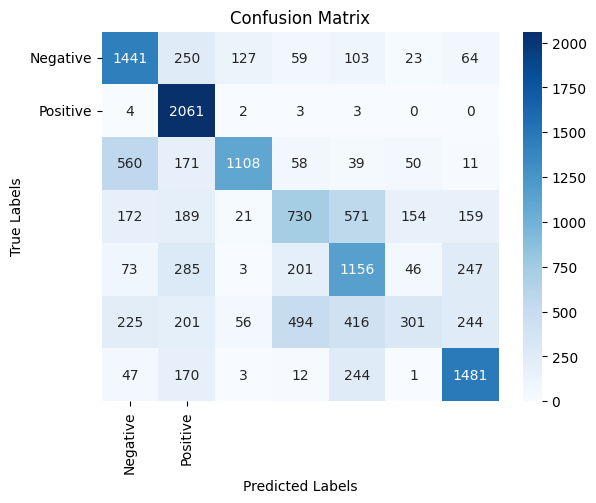

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

svm = SVC(random_state=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [136]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(14039, 7)

In [137]:
label_binarizer.transform([0])
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id


0

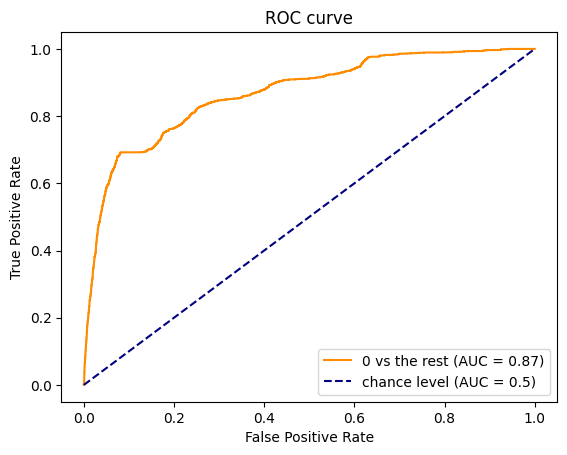

In [142]:
y_score = svm.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_onehot_test[:, class_id], y_score[:, class_id])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f"{class_of_interest} vs the rest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


In [22]:
#True Positive (TP): The classifier correctly predicted a positive class.
#False Positive (FP): The classifier incorrectly predicted a positive class when the actual class is negative.
#True Negative (TN): The classifier correctly predicted a negative class.
#False Negative (FN): The classifier incorrectly predicted a negative class when the actual class is positive.

KNN K-Nearest Neighbour

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(5,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(5,knn.score(X_test,y_test)))

c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=5NN Accuracy on Train Data: 0.7458210656282648
k=5NN Accuracy on Test Data: 0.6362988816867299


Performance Graph


[[1729   10  229   46   17   10   26]
 [  44 2007    6    3    6    3    4]
 [ 663    4 1256   39   13   19    3]
 [ 273    6  146 1141  234  171   25]
 [ 177   15   98  567  864  202   88]
 [ 240   25  138  617  306  558   53]
 [ 136   69   18  235  293  141 1066]]


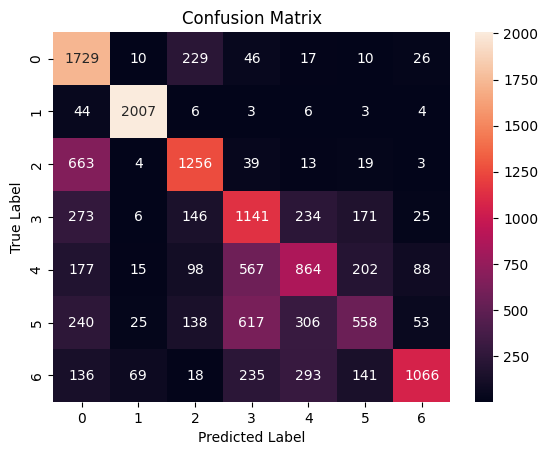

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


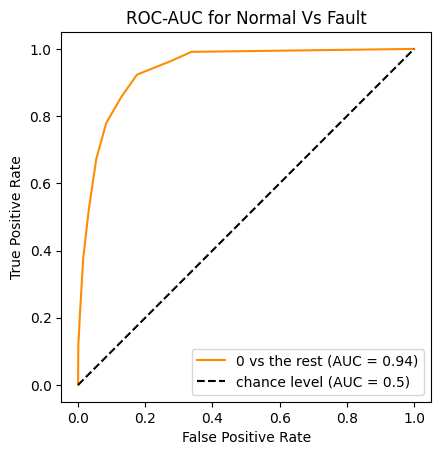

In [139]:
y_score = knn.predict_proba(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC for Normal Vs Fault")
plt.legend()
plt.show()


Random Forest Method

In [105]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=8,max_features=30,)
RFC.fit(X_train,y_train)

print("rfc Accuracy on Train Data: {}".format(RFC.score(X_train,y_train)))
print("rfc Accuracy on Test Data: {}".format(RFC.score(X_test,y_test)))

C:\Users\aryan\AppData\Local\Temp\ipykernel_23936\4102911436.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train,y_train)


rfc Accuracy on Train Data: 0.9988128027353025
rfc Accuracy on Test Data: 0.9749269891017879


[[2057    0    2    1    0    7    0]
 [   0 2065    0    0    2    4    2]
 [   4    0 1988    4    1    0    0]
 [   2    0    1 1934   17   41    1]
 [   0    6    2   63 1913   19    8]
 [  10    5    2   62   25 1823   10]
 [   6    0    2    0   17   26 1907]]


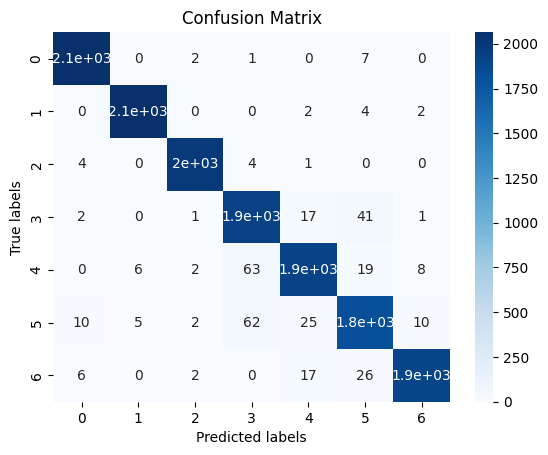

In [107]:
import seaborn as sns
y_pred = RFC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


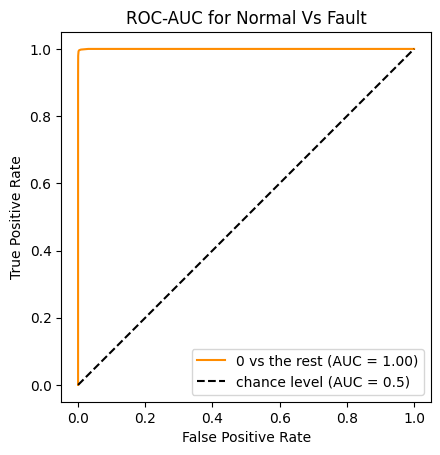

In [144]:
y_score = RFC.predict_proba(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC for Normal Vs Fault")
plt.legend()
plt.show()

## ANN
### Build Model

In [69]:
import tensorflow as tf

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(15,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                512       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-trai

In [74]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [75]:
hist = model.fit(X_train , y_train , epochs=200, validation_split=0.2)

Epoch 1/200
1053/1053 [==============================] - 2s 1ms/step - loss: 1.2538 - accuracy: 0.4489 - val_loss: 0.9860 - val_accuracy: 0.5972
Epoch 2/200
1053/1053 [==============================] - 1s 973us/step - loss: 0.7879 - accuracy: 0.6805 - val_loss: 0.6928 - val_accuracy: 0.7241
Epoch 3/200
1053/1053 [==============================] - 1s 973us/step - loss: 0.5856 - accuracy: 0.7666 - val_loss: 0.5126 - val_accuracy: 0.8040
Epoch 4/200
1053/1053 [==============================] - 1s 959us/step - loss: 0.4894 - accuracy: 0.8092 - val_loss: 0.4230 - val_accuracy: 0.8275
Epoch 5/200
1053/1053 [==============================] - 1s 955us/step - loss: 0.4078 - accuracy: 0.8357 - val_loss: 0.3763 - val_accuracy: 0.8420
Epoch 6/200
1053/1053 [==============================] - 1s 994us/step - loss: 0.3757 - accuracy: 0.8482 - val_loss: 0.3455 - val_accuracy: 0.8571
Epoch 7/200
1053/1053 [==============================] - 1s 963us/step - loss: 0.3439 - accuracy: 0.8603 - val_loss: 0.3

### plot training history

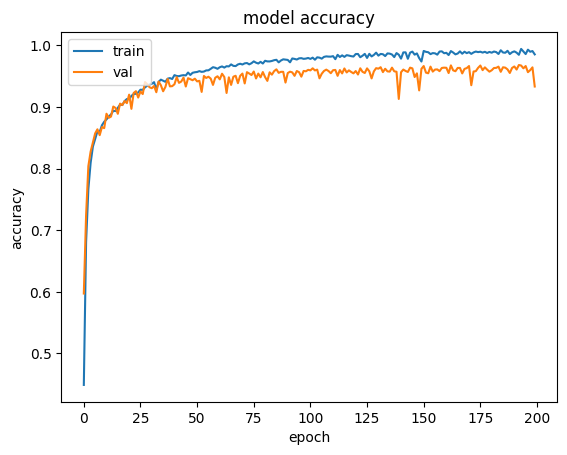

In [76]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

439/439 [==============================] - 0s 648us/step


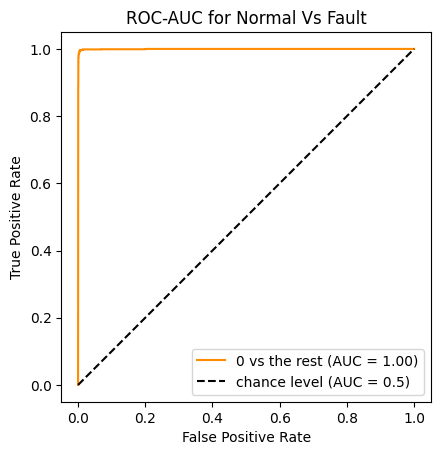

In [141]:
y_score = model.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC for Normal Vs Fault")
plt.legend()
plt.show()


## Prediction

In [85]:
from sklearn.metrics._scorer import accuracy_score

In [86]:
p=model.predict(X_test)
a1=[]
for i in p:
    a1.insert(len(a1),i.argmax())

439/439 [==============================] - 0s 559us/step


439/439 [==============================] - 0s 602us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2067
           1       1.00      1.00      1.00      2073
           2       0.97      0.99      0.98      1997
           3       0.84      0.93      0.88      1996
           4       0.91      0.83      0.87      2011
           5       0.89      0.88      0.88      1937
           6       0.99      0.94      0.96      1958

    accuracy                           0.94     14039
   macro avg       0.94      0.94      0.94     14039
weighted avg       0.94      0.94      0.94     14039



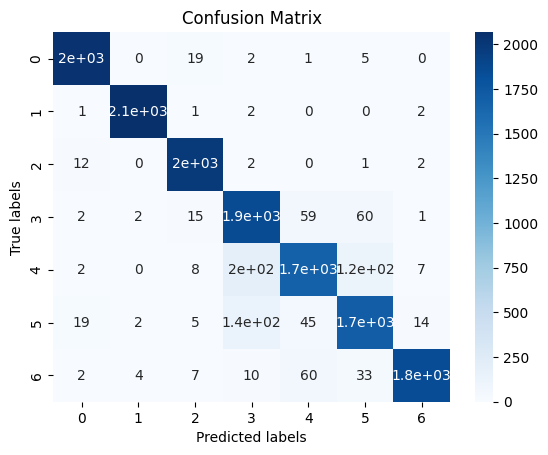

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


In [88]:
accuracy_score(a1,y_test)

0.9380297742004416

In [89]:
inn=0
a=[]
b=[]
le=int((len(p))/100)
for i in range(0,le):
    a.insert(len(a),np.argmax(p[i]))
    b.insert(len(b),inn)
    inn+=1

In [90]:
len(a)

140

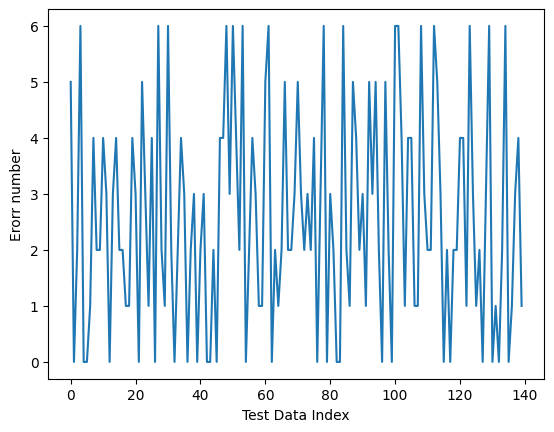

In [91]:
import matplotlib.pyplot as plt
plt.xlabel('Test Data Index')
plt.ylabel('Erorr number')
plt.plot(b,a)